In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


/home/lawrence/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("mnist_data/")


Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [4]:
def display_digit(digit):
    plt.imshow(digit.reshape(28,28),cmap="Greys",interpolation="nearest")

In [5]:
training_digits,training_labels=mnist.train.next_batch(42000)
test_digits,test_labels=mnist.test.next_batch(200)

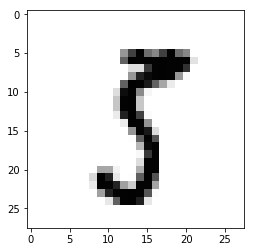

In [6]:
display_digit(training_digits[1])

In [7]:
training_labels[1:5]

array([5, 1, 8, 6], dtype=uint8)

In [8]:
tf.reset_default_graph()#clears the existing session of any existing modes and 
#enabling us create a computation graph from scratch

In [9]:
training_digits_pl=tf.placeholder("float",[None,784])
test_digits_pl=tf.placeholder("float",[784])

In [10]:
def get_majority_predicted_label(labels,indices):
    predicted_labels=[]
    for i in indices:
        predicted_labels.append(labels[i])#find the predicted_labels in our nerest
    predicted_labels=np.array(predicted_labels)#convert to an array
    print(predicted_labels)
    counts=np.bincount(predicted_labels)#counts how many times each has been predicted
    return np.argmax(counts)

In [16]:
#calculating l1 distance
#l1_distance=tf.abs(tf.subtract(training_digits_pl,test_digits_pl))
#distance_l1=tf.reduce_sum(l1_distance,axis=1)
#calculating l2distance
l2_distance=tf.square(tf.subtract(training_digits_pl,test_digits_pl))
distance_l2=tf.sqrt(tf.reduce_sum(l1_distance,axis=1))
#finding those images that are nearest to out test image
#pred_nn_l1=tf.nn.top_k(tf.negative(distance_l1),k=5)#top_k sorts images from the furthest to the closest,
pred_nn_l2=tf.nn.top_k(tf.negative(distance_l2),k=5)#top_k sorts images from the furthest to the closest,
#using k=1 gives the index of that image
#using k=1 gives the index of that image


In [17]:
accuracy=0

In [18]:
init=tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(len(test_digits)):
        
    
        _,indices=sess.run(pred_nn_l2,feed_dict={training_digits_pl:training_digits,test_digits_pl:test_digits[i,:]})
        predicted_label=get_majority_predicted_label(training_labels,indices)
    
        print("test",i,"prediction",predicted_label,"testLabel",test_labels[i])
    
        if predicted_label==test_labels[i]:
            accuracy=accuracy+1./len(test_digits)
        
        
print("training done!")
print("Accuracy of:",accuracy)

[0 0 0 0 0]
test 0 prediction 0 testLabel 0
[3 3 3 3 3]
test 1 prediction 3 testLabel 3
[3 3 3 3 3]
test 2 prediction 3 testLabel 3
[3 3 3 3 3]
test 3 prediction 3 testLabel 3
[9 9 4 9 9]
test 4 prediction 9 testLabel 9
[4 4 4 4 4]
test 5 prediction 4 testLabel 4
[2 2 2 2 2]
test 6 prediction 2 testLabel 2
[0 0 0 0 0]
test 7 prediction 0 testLabel 0
[2 2 2 2 2]
test 8 prediction 2 testLabel 2
[9 9 9 9 9]
test 9 prediction 9 testLabel 9
[6 6 6 6 6]
test 10 prediction 6 testLabel 6
[3 3 3 3 3]
test 11 prediction 3 testLabel 3
[2 2 2 2 2]
test 12 prediction 2 testLabel 2
[5 5 5 5 5]
test 13 prediction 5 testLabel 5
[9 7 9 9 9]
test 14 prediction 9 testLabel 9
[9 9 9 9 9]
test 15 prediction 9 testLabel 9
[2 2 2 2 2]
test 16 prediction 2 testLabel 2
[1 1 1 1 1]
test 17 prediction 1 testLabel 2
[5 5 5 5 5]
test 18 prediction 5 testLabel 5
[3 3 3 3 3]
test 19 prediction 3 testLabel 3
[4 4 4 4 4]
test 20 prediction 4 testLabel 4
[8 8 8 8 8]
test 21 prediction 8 testLabel 8
[7 7 7 7 7]
test 22 

[5 5 5 5 5]
test 181 prediction 5 testLabel 5
[7 7 7 7 7]
test 182 prediction 7 testLabel 7
[9 9 9 9 9]
test 183 prediction 9 testLabel 9
[2 2 2 2 1]
test 184 prediction 2 testLabel 2
[8 8 8 8 8]
test 185 prediction 8 testLabel 8
[1 1 1 1 1]
test 186 prediction 1 testLabel 1
[2 2 2 2 2]
test 187 prediction 2 testLabel 2
[3 3 3 3 3]
test 188 prediction 3 testLabel 3
[8 8 8 8 8]
test 189 prediction 8 testLabel 8
[3 3 3 3 3]
test 190 prediction 3 testLabel 3
[1 1 1 1 1]
test 191 prediction 1 testLabel 1
[7 1 7 7 7]
test 192 prediction 7 testLabel 7
[1 1 1 1 1]
test 193 prediction 1 testLabel 1
[2 2 2 2 2]
test 194 prediction 2 testLabel 2
[4 4 4 4 4]
test 195 prediction 4 testLabel 4
[5 5 5 5 5]
test 196 prediction 5 testLabel 5
[6 6 6 6 6]
test 197 prediction 6 testLabel 6
[5 5 5 5 5]
test 198 prediction 5 testLabel 5
[1 1 1 1 1]
test 199 prediction 1 testLabel 1
training done!
Accuracy of: 0.9700000000000008
